**ANN using Keras / Tensorflow**

*Baseline Implementation*

63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
Accuracy: 0.8645 = 86.45%
F1 Score: 0.5961 = 59.61%


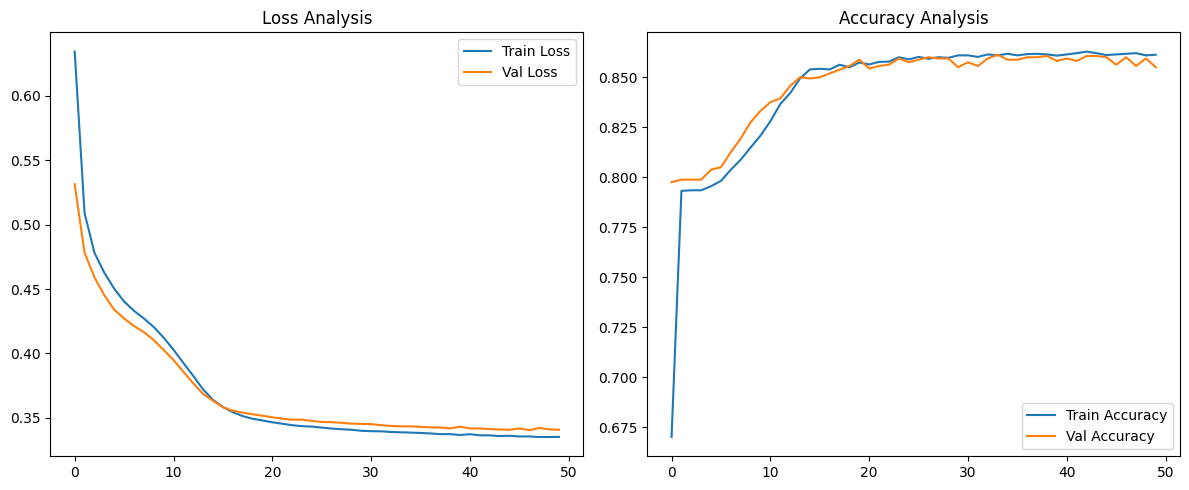

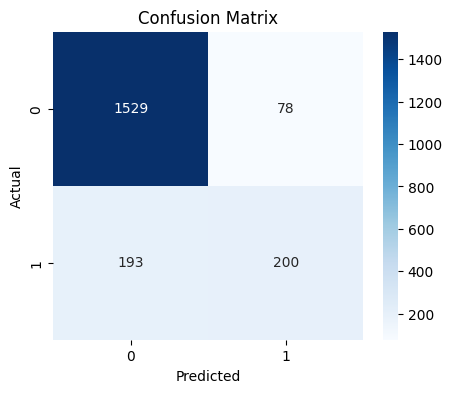

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input

# 1. Data Loading & Preprocessing
df = pd.read_csv('Churn_Modelling.csv')

X = df.iloc[:, 3:-1].values
y = df.iloc[:, -1].values

# Encode Gender
le = LabelEncoder()
X[:, 2] = le.fit_transform(X[:, 2])

# One-Hot Encode Geography
ct = ColumnTransformer(
    transformers=[('encoder', OneHotEncoder(), [1])],
    remainder='passthrough'
)
X = np.array(ct.fit_transform(X))

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Feature Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# 2. ANN Architecture (Fixed - No Warning)
ann = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(units=6, activation='relu'),
    Dense(units=6, activation='relu'),
    Dense(units=1, activation='sigmoid')
])

# 3. Compile and Train
ann.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

history = ann.fit(
    X_train,
    y_train,
    batch_size=32,
    epochs=50,
    validation_split=0.2,
    verbose=0
)

# 4. Predictions & Metrics
y_pred = (ann.predict(X_test) > 0.5).astype(int)

accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f} = {accuracy * 100:.2f}%")
print(f"F1 Score: {f1:.4f} = {f1 * 100:.2f}%")

# 5. Visualisations

# Plot 1: Learning Curves
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss Analysis')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Accuracy Analysis')
plt.legend()

plt.tight_layout()
plt.savefig('learning_curves.png')
plt.show()

# Plot 2: Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.savefig('confusion_matrix.png')
plt.show()

*Hyperparameter Implementation*

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step

--- Hyperparameter Tuning Results ---
Baseline Accuracy: 86.45%
Tuned Accuracy: 86.70%
Tuned F1 Score: 59.57%


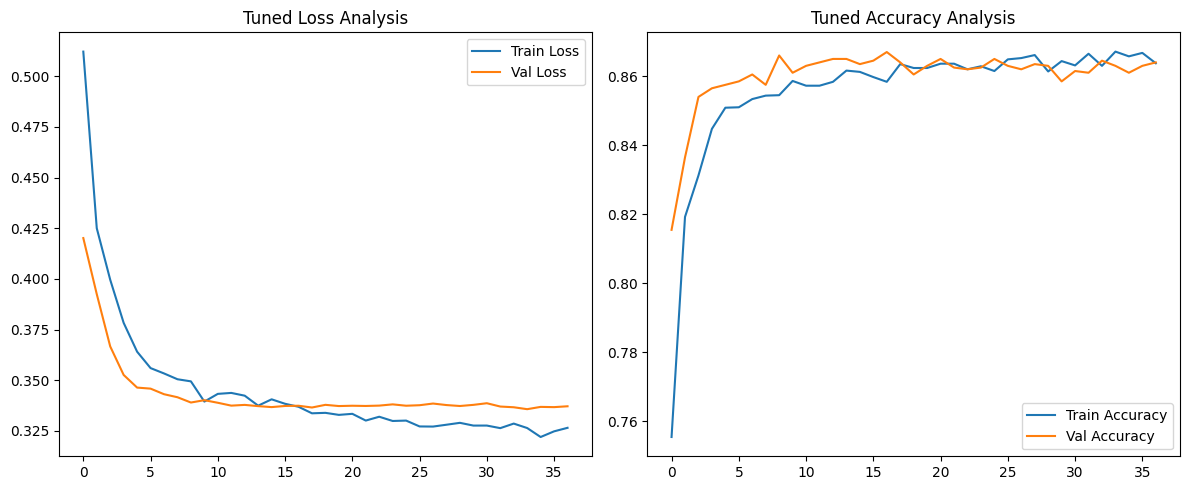

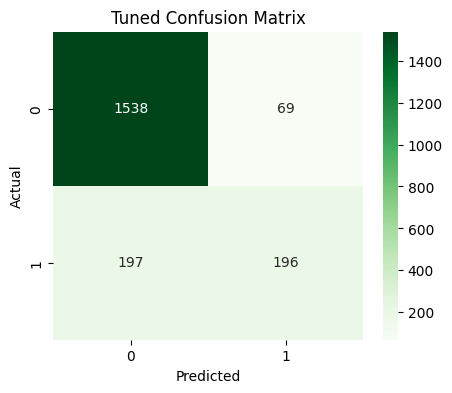

In [33]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

# Set seeds for guaranteed reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# 1. Data Loading & Preprocessing
df = pd.read_csv('Churn_Modelling.csv')
X = df.iloc[:, 3:-1].values
y = df.iloc[:, -1].values

# Encode Gender
le = LabelEncoder()
X[:, 2] = le.fit_transform(X[:, 2])

# One-Hot Encode Geography
ct = ColumnTransformer(
    transformers=[('encoder', OneHotEncoder(), [1])],
    remainder='passthrough'
)
X = np.array(ct.fit_transform(X))

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Feature Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# 2. Optimized ANN Architecture (Hyperparameter Tuned)
ann = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(units=32, activation='relu'), # Increased units
    tf.keras.layers.Dropout(0.1),                      # Added Regularization
    tf.keras.layers.Dense(units=16, activation='relu'), # Second hidden layer
    tf.keras.layers.Dense(units=8, activation='relu'),  # Third hidden layer
    tf.keras.layers.Dense(units=1, activation='sigmoid')
])

# 3. Compilation
ann.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# 4. Training with Peak Performance Capture (Early Stopping)
early_stop = tf.keras.callbacks.EarlyStopping(
    monitor='val_accuracy',
    mode='max',
    patience=20,
    restore_best_weights=True
)

history = ann.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    batch_size=32,
    epochs=150,
    callbacks=[early_stop],
    verbose=0
)

# 5. Evaluation
y_pred = (ann.predict(X_test) > 0.5).astype(int)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("\n--- Hyperparameter Tuning Results ---")
print(f"Baseline Accuracy: 86.45%")
print(f"Tuned Accuracy: {accuracy * 100:.2f}%")
print(f"Tuned F1 Score: {f1 * 100:.2f}%")

# 6. Visualizations
# Learning Curves
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Tuned Loss Analysis')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Tuned Accuracy Analysis')
plt.legend()
plt.tight_layout()
plt.show()

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
plt.title('Tuned Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()